In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def OU_current(T,I_0=0,sigma=1,tau=0.003, DeltaT=1/20000.):
    '''
    T : gives the simulation time in seconds
    other parameters as in Pozzorini et al 2015
    '''
    def DeltaI(I):
        return (I_0-I)*DeltaT/tau + sqrt(2*sigma**2*DeltaT/tau)*randn()
    
    I = zeros(int(T/DeltaT))
    I[0] = I_0 #set the initial value to the mean input
    
    for i in xrange(1,len(I)):
        I[i] = I[i-1]+DeltaI(I[i-1])
        
    return I

9.78173833086 2.13721816959


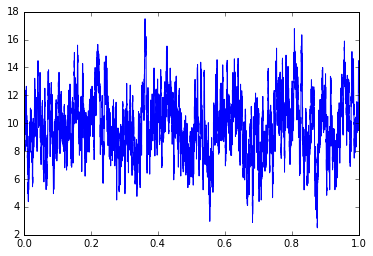

In [3]:
def TestPlot():
    T=1; dt = 1/20000.
    I = OU_current(T=1, I_0=10, sigma=2, DeltaT=dt)
    plt.plot(np.linspace(0,T,1/dt),I)
    print 'Mean Current:', I.mean(), 'mV','Standard Deviaton:' , I.std(),'mV' #okay

Export stimulation current to TPL file (patchmaster)
>Template Files for stimulation can be used in Voltage Clamp and in Current Clamp mode. In Current Clamp
mode, the stimulation data is defined in volts, where 1 mV corresponds with 1 pA current injection.
Example: A value of 0.1 would result in a current injection of 100 pA.

In [5]:
def save_stim():
    I = OU_current(T=10, I_0=400, sigma=100, DeltaT=1/20000.) #in pA

    #convert to mV
    I_mV = 1e-3*I

    # store the values in pA to a binary file
    (I_mV).astype('f4').tofile('stim_files/I_noise_test_10s.tpl')